###  Setting

In [1]:
MOUNT_PATH = "/run/user/1000/gvfs/smb-share:server=azlab-fs01,share=東研究室/個人work/富井/"

In [2]:
DATA_PATH = MOUNT_PATH + "PYUSCT_train/dataset010/full_visual/"
MODEL_PATH = MOUNT_PATH + "PYUSCT_train/dataset010/model/"
model_name = "clf_GPC_rbf_iso"

In [3]:
%ls $MODEL_PATH

clf_GPC_rbf_iso.pkl*  pca1000.pkl*


### Load model

In [4]:
from sklearn.externals import joblib

In [5]:
model_clf= joblib.load(MODEL_PATH + model_name + ".pkl")

In [6]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [7]:
model_clf

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=1, n_restarts_optimizer=0,
             optimizer='fmin_l_bfgs_b', random_state=None,
             warm_start=False)

### Load data

In [8]:
import numpy as np
from os import listdir
from os.path import isfile, join

In [9]:
files = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]
files.sort()

In [10]:
join(DATA_PATH, files[0])

'/run/user/1000/gvfs/smb-share:server=azlab-fs01,share=東研究室/個人work/富井/PYUSCT_train/dataset010/full_visual/part000_size65536.npy'

In [11]:
import time

In [12]:
time.ctime()

'Wed Apr  4 11:44:39 2018'

In [13]:
batch = 65536
count = 0
data = np.zeros(512*512)
data_proba = np.zeros((512*512,2))
for f in files:
    print("{} : turn{} start.".format(time.ctime(), count))
    tmp = np.load(join(DATA_PATH, f))
    data[count*batch:(count+1)*batch] = model_clf.predict(tmp)
    data_proba[count*batch:(count+1)*batch] = model_clf.predict_proba(tmp)
    print("{} : turn{} finished.".format(time.ctime(), count))
    print()
    count += 1
    

Wed Apr  4 11:47:10 2018 : turn0 start.
Wed Apr  4 11:53:55 2018 : turn0 finished.

Wed Apr  4 11:53:55 2018 : turn1 start.
Wed Apr  4 12:00:35 2018 : turn1 finished.

Wed Apr  4 12:00:35 2018 : turn2 start.
Wed Apr  4 12:07:17 2018 : turn2 finished.

Wed Apr  4 12:07:17 2018 : turn3 start.
Wed Apr  4 12:14:00 2018 : turn3 finished.



In [14]:
count

4

In [15]:
data.shape

(262144,)

In [16]:
data_visual = data.reshape((512,512))
data_proba_visual = data_proba[:,1].reshape((512, 512))

## BUG: Axis reversed

In [28]:
data_visual = np.swapaxes(data_visual,0,1)
data_proba_visual = np.swapaxes(data_proba_visual,0,1)

In [29]:
data_visual.shape

(512, 512)

In [30]:
data_proba_visual.shape

(512, 512)

In [31]:
np.save(DATA_PATH + "res_data_01_visual.npy", data_visual)
np.save(DATA_PATH + "res_data_proba_visual.npy", data_proba_visual)

### Show image

In [19]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

% matplotlib inline

# mpl.style.use('classic')

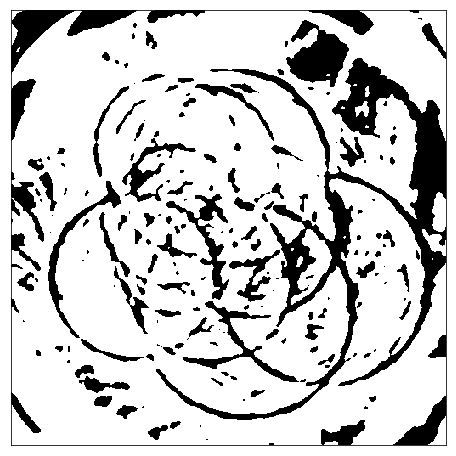

In [32]:
plt.figure(figsize=(8, 8))
# plt.suptitle(title, size=16)
plt.imshow(data_visual, 
            cmap=plt.cm.Greys,
            #vmin=-vmax, vmax=vmax
          )
plt.xticks([])
plt.yticks([])
plt.show()

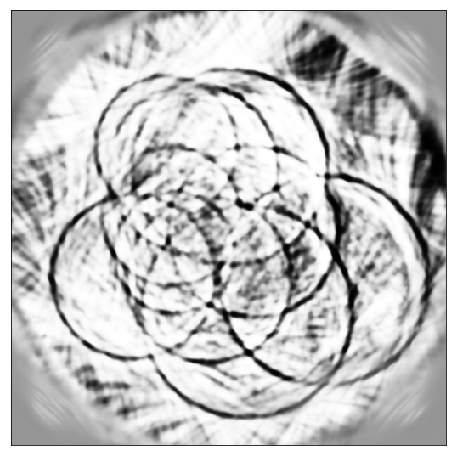

In [33]:
plt.figure(figsize=(8, 8))
# plt.suptitle(title, size=16)
plt.imshow(data_proba_visual, 
            cmap=plt.cm.Greys,
            #vmin=-vmax, vmax=vmax
          )
plt.xticks([])
plt.yticks([])
plt.show()

In [40]:
import matplotlib.image as mpimg
%cd ~/Documents

/home/yuhui/Documents


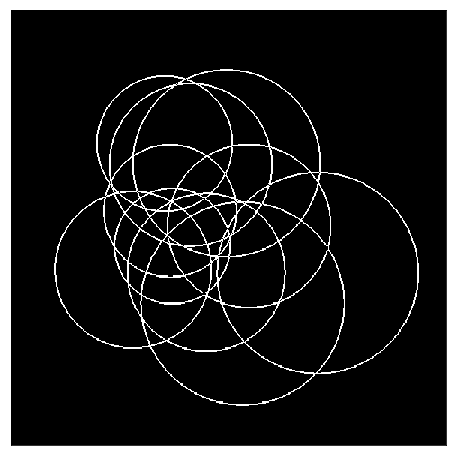

In [45]:
plt.figure(figsize=(8, 8))
img=mpimg.imread('edge.png')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()